# Hay 3 datasets en total.. el de entrenamiento y test, el de productos y el que se saca de la api

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

## Variables de la api:

**user_id:** User identifier - *Identificador de usuario.*

**country:** Country identifier - *Identificador de país.*

**R:** User's recency - *Última visita al página*

**F:** User's purchase frequency - *Última compra*

**M:** Monetary value that the customer spends on purchases - *Lo que se gasta el usuario*

# Primer Endpoint

In [6]:
# import requests
# import csv
# import os

# # Función para obtener todos los usuarios
# def get_all_user_ids():
#     url = "https://zara-boost-hackathon.nuwe.io/users"  # Asumido endpoint para todos los usuarios
    
#     try:
#         # Realizamos la solicitud GET
#         response = requests.get(url)
        
#         # Comprobamos el código de estado de la respuesta
#         if response.status_code == 200:
#             # Si la solicitud es exitosa, devolvemos el JSON de la respuesta
#             return response.json()  # Esto debería ser una lista de los user_ids
#         else:
#             # Si hubo un error, mostramos el código de error y el mensaje
#             print(f"Error {response.status_code}: {response.text}")
#             return None
#     except Exception as e:
#         # Capturamos excepciones si hay problemas de conexión
#         print(f"Error de conexión: {e}")
#         return None

# # Función para guardar los usuarios en un archivo CSV en la ubicación deseada
# def save_users_to_csv(user_data, filename='data/raw/all_users_id.csv'):
#     # Asegúrate de que la carpeta existe, si no, la creamos
#     os.makedirs(os.path.dirname(filename), exist_ok=True)

#     # Abrimos el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='', encoding='utf-8') as file:
#         writer = csv.writer(file)
        
#         # Escribimos los encabezados (si tienes una lista de diccionarios o los valores que necesites)
#         writer.writerow(['user_id'])  # Modifica esto si tienes más columnas
        
#         # Escribimos los datos de cada usuario
#         for user in user_data:  # Si los datos son una lista de user_ids
#             writer.writerow([user])  # Escribe cada user_id en una fila
    
#     print(f"Datos guardados correctamente en {filename}")

# # Obtener los usuarios
# all_users = get_all_user_ids()

# # Si se obtuvieron datos, guardarlos en CSV
# if all_users:
#     save_users_to_csv(all_users, filename='data/raw/all_users_id.csv')  # Guarda los usuarios en 'data/raw/all_users_id.csv'
# else:
#     print("No se pudieron obtener los usuarios.")

users_id = pd.read_csv("data/raw/all_users_id.csv")

In [12]:
users_id.columns

Index(['user_id'], dtype='object')

In [ ]:
# Hay duplicados?
conteo_duplicados = users_id['user_id'].value_counts()
duplicados = conteo_duplicados[conteo_duplicados > 1]
print(duplicados)

Series([], Name: count, dtype: int64)


# Segundo Enpoint

In [166]:
import requests

# Función para obtener los detalles de un usuario
def get_user_details(user_id):
    # URL para obtener los detalles del usuario
    url = f"https://zara-boost-hackathon.nuwe.io/users/{user_id}"
    
    try:
        # Realizamos la solicitud GET
        response = requests.get(url)
        
        # Comprobamos el código de estado de la respuesta
        if response.status_code == 200:
            # Si la solicitud es exitosa, devolvemos el JSON de la respuesta
            return response.json()
        else:
            # Si hubo un error, mostramos el código de error y el mensaje
            print(f"Error {response.status_code}: {response.text}")
            return None
    except Exception as e:
        # Capturamos excepciones si hay problemas de conexión
        print(f"Error de conexión: {e}")
        return None

# Prueba: obtenemos los detalles del usuario con ID 1556
user_details = get_user_details("1556")

# Imprimimos los detalles del usuario
if user_details:
    print("Detalles del usuario:", user_details)
else:
    print("No se pudieron obtener los detalles del usuario.")


Detalles del usuario: {'user_id': 1556, 'values': {'country': [25], 'R': [18], 'F': [3], 'M': [20.599999999999998]}}


# Variables de train

**session_id:** Session identifier - *Identificador de sesión*

**date:** Interaction date - *Día de la interacción*

**timestamp_local:** Interaction timestamp - *Hora de la interacción*

**user_id:** User identifier - *Identificador de usuario*

**country:** Country identifier - *Identificador de pais*

**partnumber:** Product identifier with which the interaction occurred - *Producto interacción*

**device_type:** Type of device used - *Tipo de servicio usado*

**pagetype:** Type of page where the interaction occurred within the e-commerce site - *Tipo de página*

**VARIABLE OBJETIVO: add_to_cart**: Boolean indicating if the interaction was adding to the cart - *Añadido al carrito*

In [2]:
train = pd.read_csv("data/raw/train.csv")

In [170]:
test = pd.read_csv("data/raw/test.csv")

In [138]:
train.head()

,session_id,date,timestamp_local,add_to_cart,user_id,country,partnumber,device_type,pagetype
0,64,2024-06-06,2024-06-06 16:43:17.389,0,NaN,29,14327,1,24
1,117,2024-06-08,2024-06-08 15:11:02.782,0,NaN,57,38422,1,24
2,117,2024-06-08,2024-06-08 15:11:44.797,0,NaN,57,19763,1,24
3,579,2024-06-05,2024-06-05 19:24:48.397,0,NaN,29,30253,1,24
4,1220,2024-06-04,2024-06-04 08:21:13.476,0,480729.0,25,1592,1,24


In [4]:
train.columns

Index(['session_id', 'date', 'timestamp_local', 'add_to_cart', 'user_id',
       'country', 'partnumber', 'device_type', 'pagetype'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       int64  
 1   date             object 
 2   timestamp_local  object 
 3   add_to_cart      int64  
 4   user_id          float64
 5   country          int64  
 6   partnumber       int64  
 7   device_type      int64  
 8   pagetype         float64
dtypes: float64(2), int64(5), object(2)
memory usage: 3.1+ GB


In [6]:
train.describe()

,session_id,add_to_cart,user_id,country,partnumber,device_type,pagetype
count,4.655144e+07,4.655144e+07,6.856730e+06,4.655144e+07,4.655144e+07,4.655144e+07,4.655025e+07
mean,2.582898e+06,5.898384e-02,2.785741e+05,3.644275e+01,2.171479e+04,1.144113e+00,2.390146e+01
std,1.493335e+06,2.355945e-01,1.610572e+05,1.245243e+01,1.248680e+04,5.080278e-01,1.273987e+00
min,1.000000e+00,0.000000e+00,1.000000e+00,2.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.289981e+06,0.000000e+00,1.382670e+05,2.900000e+01,1.105200e+04,1.000000e+00,2.400000e+01
50%,2.580033e+06,0.000000e+00,2.784610e+05,2.900000e+01,2.164900e+04,1.000000e+00,2.400000e+01
75%,3.875410e+06,0.000000e+00,4.179960e+05,5.700000e+01,3.242300e+04,1.000000e+00,2.400000e+01
max,5.171848e+06,1.000000e+00,5.570060e+05,5.700000e+01,4.369200e+04,3.000000e+00,3.700000e+01


### Parseamos Fechas y horas:

In [46]:
#timestamp_local
train['timestamp_local'] = pd.to_datetime(train['timestamp_local'])

#date
train['date'] = pd.to_datetime(train['date'])

In [171]:
#timestamp_local
test['timestamp_local'] = pd.to_datetime(test['timestamp_local'])

#date
test['date'] = pd.to_datetime(test['date'])

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   session_id       int64         
 1   date             datetime64[ns]
 2   timestamp_local  datetime64[ns]
 3   add_to_cart      int64         
 4   user_id          float64       
 5   country          int64         
 6   partnumber       int64         
 7   device_type      int64         
 8   pagetype         float64       
dtypes: datetime64[ns](2), float64(2), int64(5)
memory usage: 3.1 GB


## User_id

In [95]:
#Contar los valores NaN en la columna "cod_section"
cantidad_nan = train['user_id'].isnull().sum()
total_valores = len(train)

#Calcular el porcentaje 
porcentaje_nan = (cantidad_nan / total_valores) * 100

print("Porcentaje de valores NaN en user_id:", porcentaje_nan, "%")

Porcentaje de valores NaN en user_id: 85.27063982654029 %


In [137]:
#Hay 380 052 usuarios únicos
train['user_id'].nunique()

380035

## Country

In [ ]:
# cantidad_nan = train['country'].isnull().sum()
# print("Cantidad de valores nulos:", cantidad_nan)

In [ ]:
#Parece que solo hay 4 paises
train["country"].value_counts()

country
29    13664727
57    11946880
34    10635284
25    10304554
Name: count, dtype: int64

## partnumber       

In [103]:
# cantidad_nan = train['partnumber'].isnull().sum()
# print("Cantidad de valores nulos:", cantidad_nan)

Cantidad de valores nulos: 0


In [102]:
train["partnumber"]

0           14327
1           38422
2           19763
3           30253
4            1592
            ...  
46551440    39901
46551441    38638
46551442    10883
46551443     3769
46551444    37323
Name: partnumber, Length: 46551445, dtype: int64

## device_type      

In [105]:
train["device_type"].unique()

array([1, 3, 2], dtype=int64)

## pagetype         

In [ ]:
# cantidad_nan = train['pagetype'].isnull().sum()
# print("Cantidad de valores nulos:", cantidad_nan)
# train = train.dropna(subset=['pagetype'])

In [172]:
# cantidad_nan = test['pagetype'].isnull().sum()
# print("Cantidad de valores nulos:", cantidad_nan)
# test = test.dropna(subset=['pagetype'])

Cantidad de valores nulos: 0


In [113]:
train['pagetype'] = train['pagetype'].apply(int)

In [173]:
test['pagetype'] = test['pagetype'].apply(int)

In [114]:
train["pagetype"].unique()

array([24,  8,  6, 19,  1,  7, 17, 16, 25, 20, 23, 10,  9, 21,  5,  3, 29,
       12, 14, 13, 26, 11, 22, 36, 15, 35, 33, 34,  2, 27, 37, 30, 31, 32,
        4, 18, 28], dtype=int64)

In [174]:
# train.to_csv("data/processed/train_pro.csv")
# test.to_csv("data/processed/test_pro.csv")

# Dataset 2:  **Productos**

In [116]:
productos = pd.read_pickle("data/raw/products.pkl")
productos

,discount,embedding,partnumber,color_id,cod_section,family
0,0,"[-0.13401361, -0.1200429, -0.016117405, -0.167...",32776,85,4.0,73
1,0,"[-0.0949274, -0.107294075, -0.16559914, -0.174...",41431,135,4.0,73
2,0,"[-0.12904441, -0.07724628, -0.09799071, -0.164...",39419,339,4.0,73
3,1,"[-0.12783332, -0.133868, -0.10101265, -0.18888...",36087,135,4.0,73
4,1,"[-0.14092924, -0.1258284, -0.10809927, -0.1765...",34132,3,4.0,73
...,...,...,...,...,...,...
43687,0,"[-0.1725829, 0.780391, -0.16265817, -0.1397962...",234,368,2.0,192
43688,0,"[-0.08114546, 0.7171631, 0.2157723, -0.1599884...",235,152,2.0,138
43689,0,"[-0.1517721, 1.640085, -0.1506274, -0.06088442...",236,226,2.0,135
43690,0,"[-0.078192495, 0.012600096, -0.085486665, 0.49...",237,122,2.0,10


## **discount:** Boolean indicating if the product is on sale - *Tiene descuento*   
 (Hay en oferta 1378 productos)



In [118]:
# cantidad_nan = productos ['discount'].isnull().sum()
# print("Cantidad de valores nulos:", cantidad_nan)

In [119]:
productos["discount"].value_counts()

discount
0    42314
1     1378
Name: count, dtype: int64

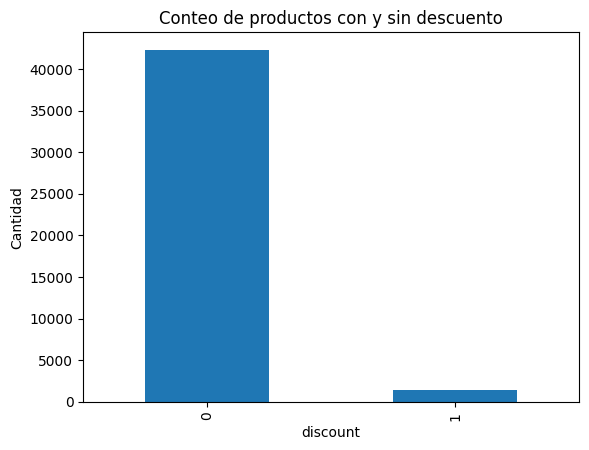

In [ ]:
# Obtener los conteos
conteo_descuentos = productos["discount"].value_counts()

# Crear el gráfico de barras
conteo_descuentos.plot(kind='bar')
plt.title('Conteo de productos con y sin descuento')
plt.ylabel('Cantidad');

## **embedding:** Embedding of the product's flat image obtained from computer vision techniques - *Vectores de la imagen plana*

(los puedo usar para recomendar prendas similares)

In [122]:
cantidad_nan = productos ['embedding'].isnull().sum()
print("Cantidad de valores nulos:", cantidad_nan)
productos = productos.dropna(subset=['embedding'])

Cantidad de valores nulos: 0


In [123]:
print(productos["embedding"].head(2))

0    [-0.13401361, -0.1200429, -0.016117405, -0.167...
1    [-0.0949274, -0.107294075, -0.16559914, -0.174...
Name: embedding, dtype: object


## **partnumber:** Product identifier - *Identificador de producto*

In [76]:
# cantidad_nan = productos ['partnumber'].isnull().sum()
# print("Cantidad de valores nulos:", cantidad_nan)

Cantidad de valores nulos: 0


In [124]:
productos["partnumber"].value_counts

<bound method IndexOpsMixin.value_counts of 0        32776
1        41431
2        39419
3        36087
4        34132
         ...  
43687      234
43688      235
43689      236
43690      237
43691      238
Name: partnumber, Length: 37522, dtype: int32>

## **color_id:** Product color identifier - *Identificador de color*


In [79]:
# cantidad_nan = productos ['color_id'].isnull().sum()
# print("Cantidad de valores nulos:", cantidad_nan)

In [125]:
productos["color_id"].unique()

array([ 85, 135, 339,   3, 174, 307, 148, 414, 335,  20,  15, 455, 461,
       153, 257, 298, 331,  53, 214, 321, 408, 254,  83, 130,  89, 306,
       120, 262, 325, 137, 383,  64,  48, 416, 346, 397, 338, 312, 505,
       371, 311,  81, 158,  86, 166, 433,  82, 213, 320, 317, 278, 144,
       112, 380, 617, 440, 560, 289,   1, 407, 400, 347, 248, 226, 441,
       600,  74, 421, 377,  37, 364, 619, 181,  75, 405, 472, 231, 310,
       296, 284,  58, 391, 267, 206, 297, 175,   5, 422, 374, 236, 333,
       368, 342, 430, 225, 227,  95, 170, 486, 188, 243, 115,  36,  62,
       369, 142,  72, 352, 195, 287,  79, 286, 205, 509, 234, 299, 199,
       457, 263, 428, 439, 215, 283, 132,  78,  52, 466, 389, 211, 218,
       637,  49, 122,  17, 471,  39, 293, 238, 314, 292, 221, 155, 102,
       521,  69, 157, 337, 288, 139,  91, 177, 313, 540, 178, 361, 261,
       349, 343, 510, 508, 489, 209, 401,  96, 420, 635, 370, 279, 354,
       201, 193, 230,   9,   6, 398,  29, 467, 632,  80, 216, 26

## **cod_section:** Section to which the product belongs - *Sección del producto*


In [126]:
#Podriamos eliminar los nan y pasar a int
productos["cod_section"].unique()

array([ 4.,  1.,  3., nan,  2.])

In [128]:
# cantidad_nan = productos ['cod_section'].isnull().sum()
# print("Cantidad de valores nulos:", cantidad_nan)
# productos = productos.dropna(subset=['cod_section'])

Cantidad de valores nulos: 0


In [129]:
productos['cod_section'] = productos['cod_section'].apply(int)

In [131]:
productos['cod_section'].unique()

array([4, 1, 3, 2], dtype=int64)

## **family:** Product family to which the product belongs - *Familia del producto*

Hay 212 familias

In [132]:
productos["family"].value_counts()

family
73     3866
156    3155
51     2818
53     1746
153    1350
       ... 
91        2
145       2
98        1
216       1
214       1
Name: count, Length: 212, dtype: int64

In [133]:
#Guardamos Productos en 
# productos.to_csv("data/processed/productos.csv")

# Task 1: Responda las siguientes preguntas y desarrolle dos funciones sobre los conjuntos de datos de entrenamiento, clientes y productos:

#### **P1:** ¿Qué producto (partnumber) con color_id igual a 3 pertenece a la familia (family) con el código más bajo que tenga descuento?

In [86]:
def encontrar_producto_mas_barato_por_familia(df):
    """
    Encuentra el producto con el color_id 3, descuento y la familia más baja.

    Args:
        df (pd.DataFrame): DataFrame de productos.

    Returns:
        pd.Series: Una serie con la información del producto buscado.
    """

    # Filtrar por color y descuento
    productos_filtrados = df[(df['color_id'] == 3) & (df['discount'] == True)] 

    # Agrupar por familia y obtener la primera familia (asumiendo orden ascendente)
    familia_minima = productos_filtrados.groupby('family')['family'].first() 

    # Obtener la familia con el código más bajo
    familia_con_menor_codigo = familia_minima.iloc[0] 

    # Obtener el producto con el partnumber
    producto_buscado = productos_filtrados[productos_filtrados['family'] == familia_con_menor_codigo]

    return producto_buscado

In [139]:
encontrar_producto_mas_barato_por_familia(productos) #Parece que si que puntua algo

,discount,embedding,partnumber,color_id,cod_section,family
19413,1,"[-0.16633523, -0.13765946, 0.31306392, -0.1556...",17265,3,4,1


#### **P2:** En el país donde la mayoría de los usuarios han realizado compras por un total inferior a 500 (M), ¿cuál es el usuario que tiene la frecuencia de compra más baja (F), la compra más reciente (R más alto) y el ID de usuario más bajo? Siga el orden dado de las variables como prioridad de clasificación.

In [31]:
train.columns

Index(['session_id', 'date', 'timestamp_local', 'add_to_cart', 'user_id',
       'country', 'partnumber', 'device_type', 'pagetype'],
      dtype='object')

In [30]:
productos.columns

Index(['discount', 'embedding', 'partnumber', 'color_id', 'cod_section',
       'family'],
      dtype='object')

#### **P3:** Entre los productos que se agregaron al carrito al menos una vez, ¿cuántas veces se visita un producto en promedio antes de que se agregue al carrito? Dé la respuesta con 2 decimales.

In [140]:
# Filtrar las interacciones donde se agregó el producto al carrito
df_agregado_al_carrito = train[train['add_to_cart'] == 1]

# Agrupar por producto y contar las visitas antes de la adición
visitas_antes_de_agregar = df_agregado_al_carrito.groupby('partnumber').size() - 1

# Calcular el promedio de visitas
promedio_visitas = visitas_antes_de_agregar.mean()

print("Promedio de visitas antes de agregar al carrito:", round(promedio_visitas, 2)) #Parece que no puntua

Promedio de visitas antes de agregar al carrito: 93.3


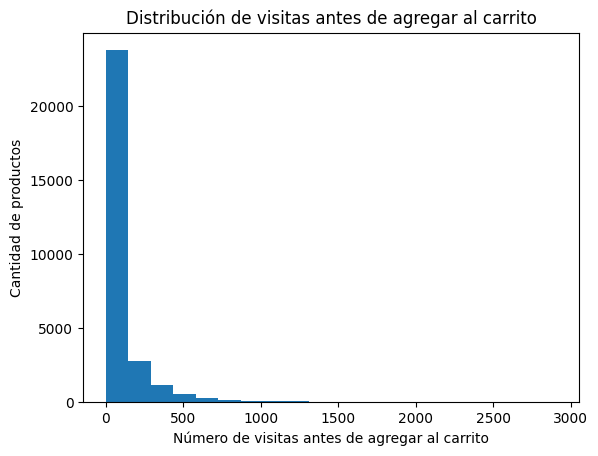

In [143]:
#Pequeña Visualización

plt.hist(visitas_antes_de_agregar, bins=20)
plt.xlabel('Número de visitas antes de agregar al carrito')
plt.ylabel('Cantidad de productos')
plt.title('Distribución de visitas antes de agregar al carrito')
plt.show()


#### P4: ¿Qué dispositivo (device_type) utilizan con más frecuencia los usuarios para realizar compras (add_to_cart = 1) de productos con descuento (discount = 1)?

In [147]:
# Fusionar los DataFrames por 'partnumber'
df_merged = pd.merge(train, productos, on='partnumber', how='left')

# Filtrar por productos con descuento y agregados al carrito
compras_con_descuento = df_merged[(df_merged['discount'] == True) & (df_merged['add_to_cart'] == 1)]

# Agrupar por dispositivo y contar las ocurrencias
conteo_por_dispositivo = compras_con_descuento['device_type'].value_counts()

# Obtener el dispositivo más utilizado
dispositivo_mas_usado = conteo_por_dispositivo.index[0]

print("El dispositivo más utilizado para comprar productos con descuento es:", dispositivo_mas_usado) #Está perfecta

El dispositivo más utilizado para comprar productos con descuento es: 1


In [158]:
train["device_type"].value_counts()

device_type
1    42977960
3     3136360
2      435928
Name: count, dtype: int64

#### P5: Entre los usuarios con frecuencia de compra (F) en el top 3 dentro de su país de compra, ¿quién ha interactuado con más productos (partnumber) en sesiones realizadas desde un dispositivo con identificador 3 (device_type = 3)?


#### P6: Para las interacciones que ocurrieron fuera del país de residencia del usuario, ¿cuántos identificadores de familia únicos hay? Tenga en cuenta cualquier país registrado para cada usuario, ya que puede haber más de un país por usuario.


In [ ]:
# import pandas as pd

# # Suponiendo que tienes los DataFrames:
# # - 'usuarios': contiene información de usuarios (user_id, country, R, F, M)
# # - 'productos': contiene información de productos (discount, embedding, partnumber, color_id, cod_section, family)
# # - 'interacciones': contiene información de interacciones (session_id, date, timestamp_local, user_id, country, partnumber, device_type, pagetype, add_to_cart)

# # Fusionar usuarios y productos por user_id
# df_usuario_producto = pd.merge(usuarios, productos, on='user_id', how='left')

# # Fusionar el resultado con interacciones por partnumber
# df_completo = pd.merge(df_usuario_producto, interacciones, on='partnumber', how='left')

# # Crear una columna para indicar si la interacción fue en otro país
# df_completo['otro_pais'] = df_completo['country_x'] != df_completo['country_y']

# # Filtrar las interacciones en otro país
# interacciones_otro_pais = df_completo[df_completo['otro_pais']]

# # Contar los identificadores de familia únicos
# familias_unicas = interacciones_otro_pais['family'].nunique()

# print("Número de familias únicas en interacciones fuera del país de residencia:", familias_unicas)

In [157]:
train["pagetype"].value_counts()

pagetype
24    46256324
8       129640
6       113491
19       19534
16       15359
7         7959
1         3652
17        2270
25         417
23         295
20         280
10         236
3          192
5          165
21         137
12          63
13          54
26          49
14          33
9           28
11          27
22          13
15          10
2            5
34           2
31           2
30           1
18           1
4            1
32           1
29           1
37           1
27           1
33           1
35           1
36           1
28           1
Name: count, dtype: int64

#### P7: Entre las interacciones de los primeros 7 días de junio, ¿cuál es el tipo de página (pagetype) más frecuente donde se agrega cada familia al carrito? Devuélvalo en el siguiente formato: {'('family'): int('most_frequent_pagetype')}. En caso de empate, devuelva el pagetype más pequeño.

In [154]:
# Filtrar las interacciones de los primeros 7 días de junio
df_junio = df_merged[(df_merged['date'].dt.month == 6) & (df_merged['date'].dt.day <= 7)]

# Filtrar las interacciones donde se agregó al carrito
df_junio_agregado = df_junio[df_junio['add_to_cart'] == 1]

# Agrupar por familia y pagetype, y contar las ocurrencias
conteo_por_familia_y_pagetype = df_junio_agregado.groupby(['family', 'pagetype']).size().reset_index(name='count')

# Encontrar el pagetype más frecuente para cada familia
pagetype_mas_frecuente = conteo_por_familia_y_pagetype.loc[conteo_por_familia_y_pagetype.groupby('family')['count'].idxmax()]

# Formatear el resultado
resultado = pagetype_mas_frecuente.set_index('family')['pagetype'].to_dict()

print(resultado)

MemoryError: Unable to allocate 1.08 GiB for an array with shape (6, 24262753) and data type int64

# Task 3

### Primer Intento

In [5]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
from sklearn.model_selection import train_test_split

import pandas as pd


In [6]:
columns_to_use = ['session_id', 'partnumber', 'add_to_cart']
train_data = pd.read_csv('data/processed/train_pro.csv', usecols=columns_to_use)

In [7]:
# Cargar los datos y aplicar el modelo
test_data = pd.read_csv('data/processed/test_pro.csv')

In [8]:
# Cargar el archivo de productos
file_path = 'data/processed/productos.csv'
products = pd.read_csv(file_path)

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import itertools

In [109]:
train_data.columns

Index(['session_id', 'timestamp_local', 'user_id', 'partnumber'], dtype='object')

In [110]:
test_data.columns

Index(['Unnamed: 0', 'session_id', 'date', 'timestamp_local', 'user_id',
       'country', 'partnumber', 'device_type', 'pagetype'],
      dtype='object')

In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46550248 entries, 0 to 46550247
Data columns (total 4 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       int64  
 1   timestamp_local  object 
 2   user_id          float64
 3   partnumber       int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ GB


In [10]:
X = train_data[['session_id', 'partnumber']]  # Usamos solo estas dos características
y = train_data['add_to_cart']  # Variable objetivo (si el producto fue añadido al carrito o no)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
import lightgbm as lgb

In [13]:
model = lgb.LGBMClassifier()  # Para clasificación
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2196514, number of negative: 35043684
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.169788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 37240198, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.058982 -> initscore=-2.769724
[LightGBM] [Info] Start training from score -2.769724


LGBMClassifier()

In [16]:
# # Entrenar el modelo RandomForestClassifier
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

In [17]:
import joblib

# Guardar el modelo entrenado
joblib.dump(model, 'models/random_LGBMClassifier.pkl')


['models/random_LGBMClassifier.pkl']

In [25]:
# Verifica si las sesiones existen en el DataFrame
target_sessions = [746, 1364, 1377]

existing_sessions = train_data['session_id'].isin(target_sessions)
print(train_data[existing_sessions])  # Muestra las filas donde session_id está en target_sessions


Empty DataFrame
Columns: [session_id, add_to_cart, partnumber]
Index: []


In [31]:
train_data["session_id"][35679]

741319

In [22]:
import pandas as pd
import itertools

# Filtra los datos para los tres targets (sesiones específicas)
target_sessions = [746, 1364, 1377]
train_data_filtered = train_data[train_data['session_id'].isin(target_sessions)]

# Predecir por cada session_id por separado
recommendations = {}

for session_id in target_sessions:
    # Filtra los datos para la sesión actual
    session_data = train_data_filtered[train_data_filtered['session_id'] == session_id]

    # Selecciona solo los productos únicos en esa sesión
    unique_products = session_data['partnumber'].unique()

    # Crear un DataFrame de combinaciones de session_id y partnumber (productos)
    session_product_combinations = pd.DataFrame(list(itertools.product([session_id], unique_products)), 
                                                columns=['session_id', 'partnumber'])

    # Verificar las dimensiones del DataFrame
    print(session_product_combinations.shape)
    print(session_product_combinations.head())
    
    # Asegúrate de que no estás añadiendo columnas no necesarias (como 'user_id', 'country', etc.)
    # Realiza las predicciones
    if session_product_combinations.shape[0] > 0:  # Verifica que haya filas
        predictions = model.predict_proba(session_product_combinations)[:, 1]  # Probabilidad de clase 1 (añadir al carrito)
    
        # Añadir las predicciones al DataFrame
        session_product_combinations['predicted_add_to_cart'] = predictions

        # Ordenar por la probabilidad de añadir al carrito (de mayor a menor)
        session_product_combinations = session_product_combinations.sort_values(by='predicted_add_to_cart', ascending=False)

        # Seleccionar los 5 productos más recomendados para esta sesión
        top_5_products = session_product_combinations.head(5)

        # Guardar los productos recomendados para esta sesión
        recommendations[session_id] = top_5_products['partnumber'].tolist()

# Mostrar las recomendaciones
print(recommendations)


(0, 2)
Empty DataFrame
Columns: [session_id, partnumber]
Index: []
(0, 2)
Empty DataFrame
Columns: [session_id, partnumber]
Index: []
(0, 2)
Empty DataFrame
Columns: [session_id, partnumber]
Index: []
{}


In [33]:
# Asumiendo que tienes un conjunto de test_ids en 'test_data' y las predicciones están en 'predictions'
test_ids = test_data['session_id']
predicted_ids = list(json_data['target'].keys())  # 'json_data' es el diccionario del JSON cargado

missing_ids = [session_id for session_id in test_ids if session_id not in predicted_ids]

if missing_ids:
    print(f"Faltan los siguientes session_ids en las predicciones: {missing_ids}")
else:
    print("Todos los session_ids están presentes en las predicciones.")


NameError: name 'json_data' is not defined

In [32]:
# Asignar valores por defecto (si es necesario) para los session_id que no tienen predicciones
for session_id in test_ids:
    if session_id not in json_data['target']:
        json_data['target'][session_id] = [0] * 5  # Suponiendo que debes poner una lista de 5 predicciones con 0


NameError: name 'test_ids' is not defined